<a href="https://colab.research.google.com/github/ayulockin/Thought-Experiments/blob/master/Meow_and_Woof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


## Imports

In [2]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

import librosa
import librosa.display
import IPython.display as ipd

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Model
from keras.layers import Input
from keras.layers import Conv1D, Dense
from keras.layers import MaxPooling1D, Dropout, GlobalMaxPooling1D, Flatten
from keras.layers import concatenate
from keras.layers.core import Reshape

from keras.preprocessing import sequence
import keras.backend as K

Using TensorFlow backend.


In [3]:
os.listdir('./My Drive/kaggle_challenges/catsdogsaudio')

['audio-cats-and-dogs.zip', 'tmp']

In [0]:
rootPath = '/gdrive/My Drive/kaggle_challenges/catsdogsaudio'

In [5]:
os.listdir(rootPath)

['audio-cats-and-dogs.zip', 'tmp']

In [6]:
os.listdir(rootPath+'/tmp')

['cats_dogs', 'train_test_split.csv', 'utils.py']

In [0]:
pathData = rootPath+'/tmp/cats_dogs/'

In [0]:
audio_files = os.listdir(pathData)

In [9]:
os.listdir(pathData)

['cats', 'dogs']

In [10]:
## Distribution of Data(cats and dogs)
num_cats = len(os.listdir(pathData+'/cats'))
num_dogs = len(os.listdir(pathData+'/dogs'))

print("Number of cats: ", num_cats)
print("Number of dogs: ", num_dogs)

Number of cats:  164
Number of dogs:  113


## Visualize Data

In [11]:
meow, sr = librosa.load(pathData+'cats/cat_5.wav')
sr

22050

In [12]:
woof, sr = librosa.load(pathData+'dogs/dog_barking_5.wav')
sr

22050

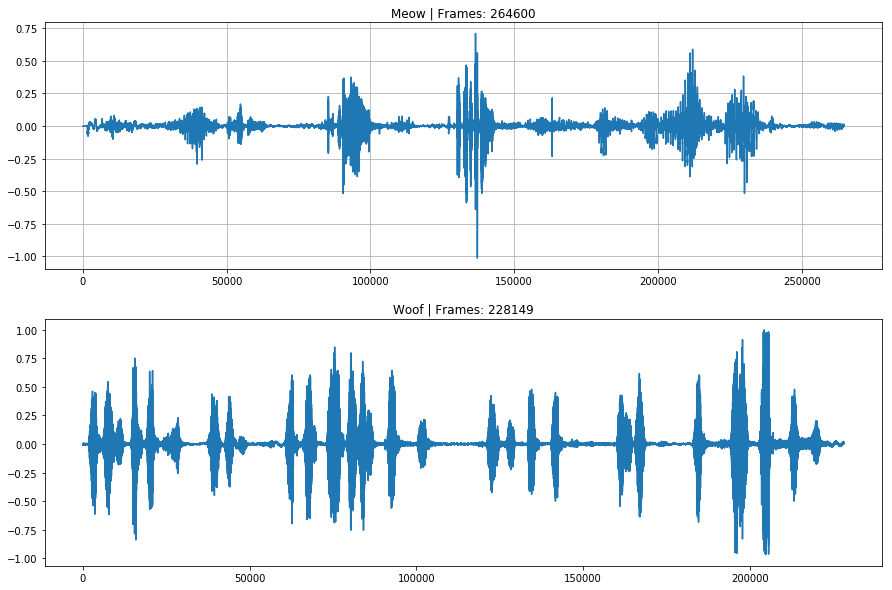

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

axs[0].set_title('Meow | Frames: {}'.format(meow.shape[0]))
axs[0].plot(meow)
axs[1].set_title('Woof | Frames: {}'.format(woof.shape[0]))
axs[1].plot(woof)

axs[0].grid(True)

## Listen to Audio

In [14]:
ipd.Audio(meow, rate=sr)

In [15]:
ipd.Audio(woof, rate=sr)

## Spectrogram

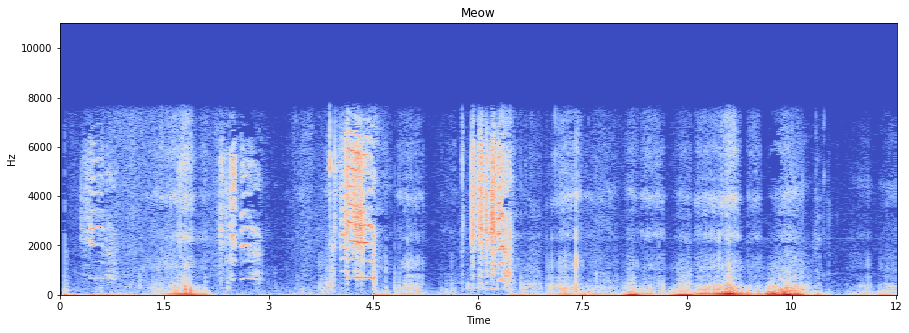

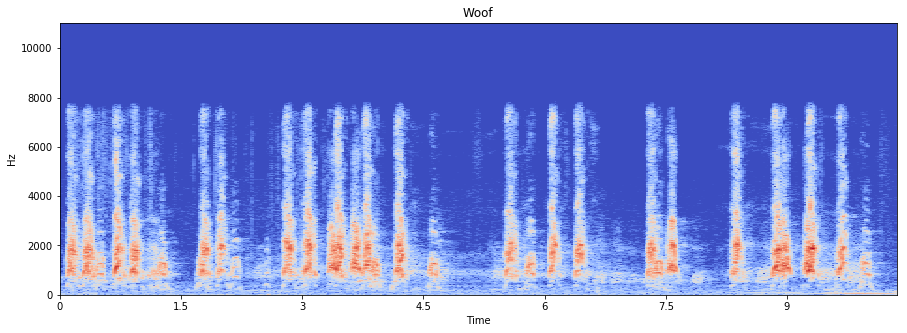

In [16]:
X_cat = librosa.stft(meow)
Xdb_cat = librosa.amplitude_to_db(abs(X_cat))

X_dog = librosa.stft(woof)
Xdb_dog = librosa.amplitude_to_db(abs(X_dog))

plt.figure(figsize=(15,5))
plt.title('Meow')
librosa.display.specshow(Xdb_cat, sr=sr, x_axis='time', y_axis='hz');

plt.figure(figsize=(15,5))
plt.title('Woof')
librosa.display.specshow(Xdb_dog, sr=sr, x_axis='time', y_axis='hz');

## Frames per category

In [0]:
# Frame per category

cats_len = []
dogs_len = []

audio_cats = os.listdir(pathData+'/cats')
audio_dogs = os.listdir(pathData+'/dogs')

In [18]:
for audio in tqdm(audio_cats):
  meow, sr = librosa.load(pathData+'cats/'+audio)
  cats_len.append(meow.shape[0])

for audio in tqdm(audio_dogs):
  woof, sr = librosa.load(pathData+'dogs/'+audio)
  dogs_len.append(woof.shape[0])

100%|██████████| 113/113 [01:31<00:00,  1.14it/s]


In [19]:
cats_len.extend(dogs_len)
avglen = np.mean(cats_len)
avglen

153023.86642599278

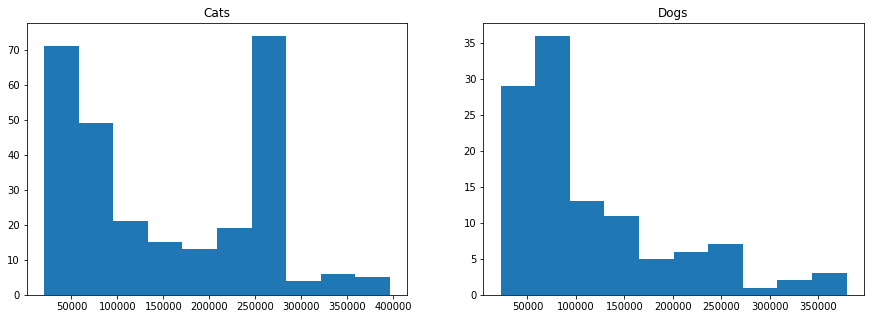

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].set_title('Cats')
axs[0].hist(cats_len);
axs[1].set_title('Dogs')
axs[1].hist(dogs_len);

## Prepare Data

In [21]:
X = []
y = []

for audio in tqdm(audio_cats):
  meow, sr = librosa.load(pathData+'cats/'+audio)
  X.append(meow)
  y.append(0)

for audio in tqdm(audio_dogs):
  woof, sr = librosa.load(pathData+'dogs/'+audio)
  X.append(woof)
  y.append(1)
  
X = np.array(X)
y = np.array(y)

100%|██████████| 113/113 [00:31<00:00,  2.48it/s]


In [0]:
X, y = shuffle(X, y, random_state=0)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X_train = sequence.pad_sequences(X_train, maxlen=int(avglen), dtype='float32')
X_train = X_train.reshape((X_train.shape+(1, )))

X_test = sequence.pad_sequences(X_test, maxlen=int(avglen), dtype='float32')
X_test = X_test.reshape((X_test.shape+(1, )))

y_train = y_train.reshape((y_train.shape[0], 1))

y_test = y_test.reshape((y_test.shape[0], 1))

In [26]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (221, 153023, 1)
y_train:  (221, 1)
X_test:  (56, 153023, 1)
y_test:  (56, 1)


In [27]:
ipd.Audio(X_train[2].flatten(), rate=sr)

In [32]:
ipd.Audio(X_train[3].flatten(), rate=sr)

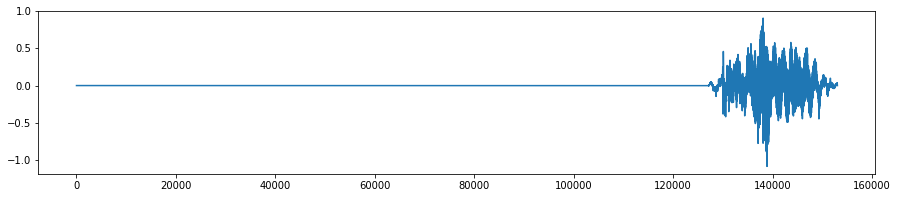

In [31]:
plt.figure(figsize=(15,3))
plt.plot(X_train[3].flatten())

## Prepare Model

In [0]:
K.clear_session()

inputs = Input(shape=(int(avglen),1))
x = Conv1D(32, 30, activation='relu')(inputs)
x = Conv1D(32, 30, activation='relu')(x)
x = MaxPooling1D(pool_size=10, strides=10)(x)
x = Dropout(0.2)(x)

x = Conv1D(64, 30, activation='relu')(x)
x = Conv1D(64, 30, activation='relu')(x)
x = MaxPooling1D(pool_size=10, strides=10)(x)
x = Dropout(0.2)(x)

x = Conv1D(128, 30, activation='relu')(x)
x = Conv1D(128, 30, activation='relu')(x)
x = MaxPooling1D(pool_size=10, strides=10)(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=x)

In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 153023, 1)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 152994, 32)        992       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 152965, 32)        30752     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15296, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15296, 32)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 15267, 64)         61504     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 15238, 64)         1229

## Compile

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train

In [40]:
hist = model.fit(X_train, y_train,
          batch_size=16,
          epochs=10,
          validation_data=(X_test, y_test))

Train on 221 samples, validate on 56 samples
Epoch 1/10
221/221 [==============================] - 13s 60ms/step - loss: 0.6772 - acc: 0.5837 - val_loss: 0.7149 - val_acc: 0.5357
Epoch 2/10
221/221 [==============================] - 11s 50ms/step - loss: 0.6261 - acc: 0.6018 - val_loss: 0.6139 - val_acc: 0.5357
Epoch 3/10
221/221 [==============================] - 11s 50ms/step - loss: 0.5823 - acc: 0.6109 - val_loss: 0.6610 - val_acc: 0.5536
Epoch 4/10
221/221 [==============================] - 11s 49ms/step - loss: 0.5991 - acc: 0.6199 - val_loss: 0.6702 - val_acc: 0.5179
Epoch 5/10
221/221 [==============================] - 11s 49ms/step - loss: 0.5546 - acc: 0.6109 - val_loss: 0.5614 - val_acc: 0.5536
Epoch 6/10
221/221 [==============================] - 11s 49ms/step - loss: 0.4657 - acc: 0.6968 - val_loss: 0.6157 - val_acc: 0.7143
Epoch 7/10
221/221 [==============================] - 11s 49ms/step - loss: 0.5534 - acc: 0.6878 - val_loss: 0.5766 - val_acc: 0.7321
Epoch 8/10
221/22

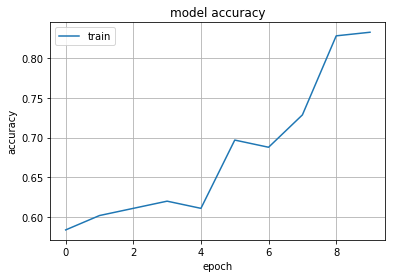

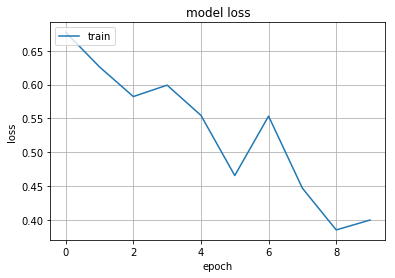

In [41]:
plt.plot(hist.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

## Visualize Intermdediate Level

In [0]:
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('conv1d_1').output)

In [43]:
intermediate_layer_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 153023, 1)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 152994, 32)        992       
Total params: 992
Trainable params: 992
Non-trainable params: 0
_________________________________________________________________


In [49]:
ipd.Audio(X_test[0].flatten(), rate=sr)

In [58]:
X_test[0].reshape((1,)+X_test[0].shape).shape

(1, 153023, 1)

In [56]:
model.predict(X_test[0].reshape((1,)+X_test[0].shape))

array([[0.53930783]], dtype=float32)

In [0]:
intermediate_output = intermediate_layer_model.predict(X_test[0].reshape((1,)+X_test[0].shape))

In [74]:
intermediate_output[0].shape

(152994, 32)

In [81]:
intermediate_output[0].T.shape

(32, 152994)

In [73]:
X_test[0].shape

(153023, 1)

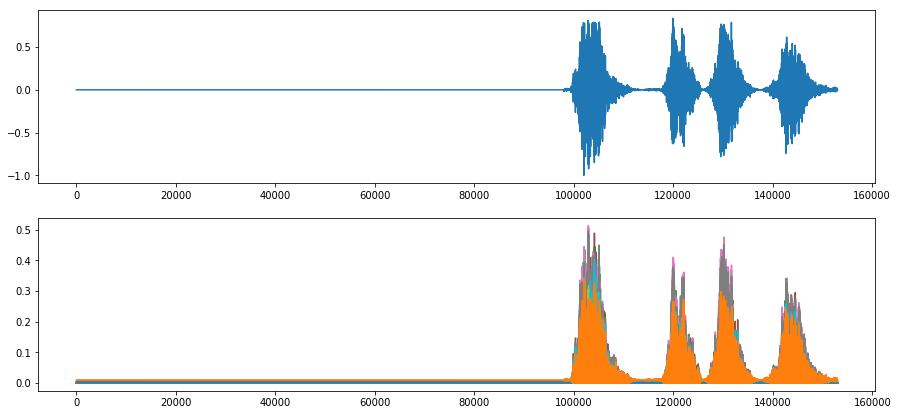

In [85]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,7));
axs[0].plot(X_test[0])
axs[1].plot(intermediate_output[0]);

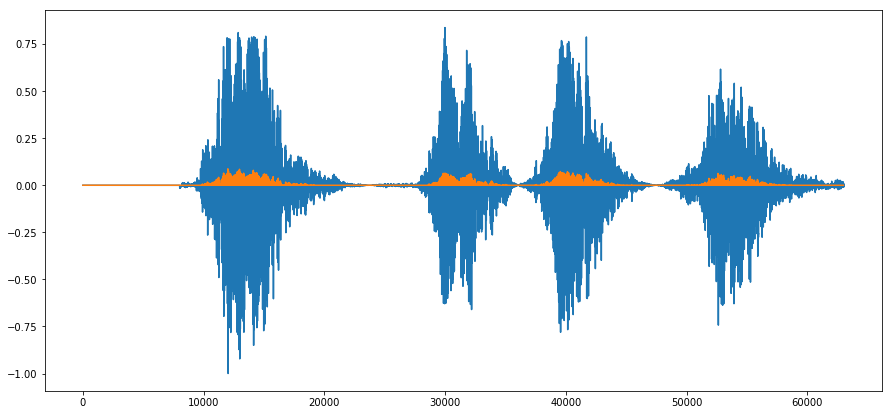

In [89]:
plt.figure(figsize=(15,7));
plt.plot(X_test[0][90000:])
plt.plot(intermediate_output[0].T[0][90000:]);

In [90]:
ipd.Audio(intermediate_output[0].T[0], rate=sr)

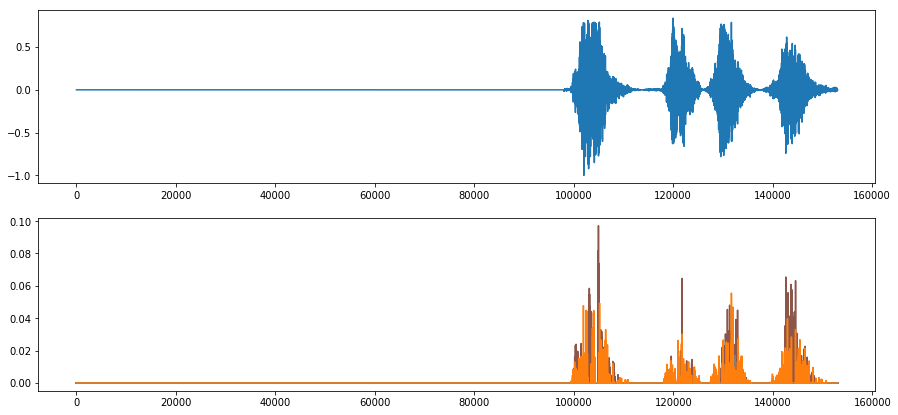

In [91]:
intermediate_layer_model2 = Model(inputs=model.input,
                                 outputs=model.get_layer('conv1d_2').output)

intermediate_output2 = intermediate_layer_model2.predict(X_test[0].reshape((1,)+X_test[0].shape))

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,7));
axs[0].plot(X_test[0])
axs[1].plot(intermediate_output2[0]);

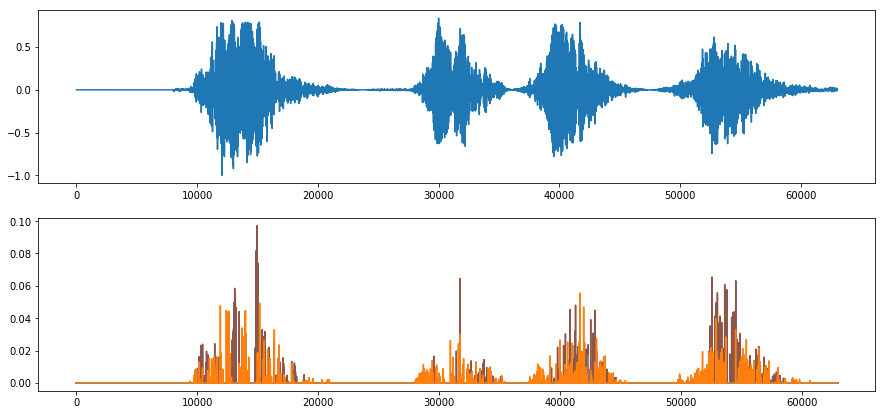

In [93]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,7));
axs[0].plot(X_test[0][90000:])
axs[1].plot(intermediate_output2[0][90000:]);